# 8 - Kidney - SVM - Metrics

In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import cross_validation, datasets, linear_model

pd.options.display.max_columns = 100
plt.rcParams['figure.figsize'] = (10.0, 4.0)

## El dataset incluye datos médicos de personas con y sin CKD (Chronic Kidney Disease)
 https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
kidney = pd.read_csv('data/chronic_kidney_disease.csv', sep=',',
                           decimal=".",header=0,
                           true_values=[' yes','\tyes','yes','present','good','ckd','ckd\t','normal'],
                           false_values=[' no','\tno','no','notpresent','poor','notckd','abnormal'],
                           na_values=['?'])

kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dn,cad,appet,pe,ane,target
0,48.0,80.0,1.020,1.0,0.0,NaN,True,False,False,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,True,True,False,True,False,False,True
1,7.0,50.0,1.020,4.0,0.0,NaN,True,False,False,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,False,False,False,True,False,False,True
2,62.0,80.0,1.010,2.0,3.0,True,True,False,False,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,False,True,False,False,False,True,True
3,48.0,70.0,1.005,4.0,0.0,True,False,True,False,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,True,False,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,True,True,False,False,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,False,False,False,True,False,False,True


In [3]:
kidney.describe()

/home/xurxo/anaconda3/envs/pyml_spk/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,390.000000,387.000000,352.000000,353.000000,350.000000,355.000000,380.000000,382.000000,312.000000,311.000000,347.000000
mean,51.423077,76.485788,1.017401,1.019830,0.451429,148.152113,57.450526,3.078403,137.508013,4.630868,12.523343
std,17.150265,13.697384,0.005723,1.353511,1.100500,79.363566,50.567265,5.747473,10.418992,3.198409,2.916220
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
_ =kidney.fillna(kidney.mean(),inplace=True)
# kidney.describe()

In [5]:
kidney.dropna( inplace=True)
# kidney.describe()

In [6]:
# kidney.head()

In [7]:
kidney['rbc'] = kidney['rbc'].astype(int)
kidney['pcc'] = kidney['pcc'].astype(int)
kidney['ba'] =  kidney['ba'].astype(int)
kidney['htn'] = kidney['htn'].astype(int)
kidney['dn'] =  kidney['dn'].astype(int)
kidney['cad'] = kidney['cad'].astype(int)
kidney['appet']=kidney['appet'].astype(int)
kidney['pe'] =  kidney['pe'].astype(int)
kidney['ane'] = kidney['ane'].astype(int)
kidney['target']=kidney['target'].astype(int)

In [8]:

kidney.corr()

,age,bp,sg,al,su,rbc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,dn,cad,appet,pe,ane,target
age,1.000000,0.078671,-0.271744,0.248671,0.173503,-0.116730,0.198091,0.058967,0.250260,0.199975,0.183397,-0.094656,0.006788,-0.220623,0.358401,0.299961,0.274526,-0.213245,0.210419,0.132792,0.286474
bp,0.078671,1.000000,-0.251330,0.346519,0.179453,-0.347990,0.205949,0.206076,0.180805,0.280567,0.343800,-0.247670,0.116672,-0.310126,0.402389,0.255087,0.221728,-0.198932,0.112290,0.318828,0.393126
sg,-0.271744,-0.251330,1.000000,-0.691076,-0.385611,0.419159,-0.467166,-0.452848,-0.482376,-0.450564,-0.459765,0.477546,-0.058870,0.649159,-0.648892,-0.601667,-0.337673,0.506517,-0.534770,-0.359309,-0.786543
al,0.248671,0.346519,-0.691076,1.000000,0.473488,-0.447137,0.471776,0.531949,0.477725,0.640476,0.647211,-0.581206,0.185120,-0.781630,0.778937,0.667577,0.399019,-0.593596,0.595463,0.553365,0.899095
su,0.173503,0.179453,-0.385611,0.473488,1.000000,-0.197556,0.185714,0.293686,0.708248,0.251132,0.290790,-0.215836,0.237393,-0.341771,0.465009,0.556855,0.459836,-0.202942,0.413859,0.118966,0.463565
rbc,-0.116730,-0.347990,0.419159,-0.447137,-0.197556,1.000000,-0.094516,-0.272895,-0.444876,-0.389352,-0.426826,0.367871,0.006454,0.443146,-0.444272,-0.483285,-0.290226,0.402984,-0.293281,-0.276680,-0.549599
pcc,0.198091,0.205949,-0.467166,0.471776,0.185714,-0.094516,1.000000,0.306420,0.235835,0.345065,0.338220,-0.398383,-0.027103,-0.508134,0.463514,0.363901,0.324291,-0.452491,0.334065,0.480107,0.506061
ba,0.058967,0.206076,-0.452848,0.531949,0.293686,-0.272895,0.306420,1.000000,0.268685,0.245016,0.226175,-0.240113,-0.002843,-0.394553,0.307141,0.315798,0.320553,-0.220319,0.364401,0.146465,0.427926
bgr,0.250260,0.180805,-0.482376,0.477725,0.708248,-0.444876,0.235835,0.268685,1.000000,0.277526,0.287747,-0.262806,0.095147,-0.403774,0.504870,0.621676,0.387956,-0.318897,0.363457,0.167150,0.558869
bu,0.199975,0.280567,-0.450564,0.640476,0.251132,-0.389352,0.345065,0.245016,0.277526,1.000000,0.903476,-0.519439,0.211523,-0.704771,0.608534,0.540774,0.377348,-0.549824,0.622821,0.646206,0.626693


###  Vamos a trabajar sólo con dos atributos para poder ver gráficos 

In [9]:
feat1= 'sod'
feat2= 'age'

reduced = kidney[[feat1,feat2,'target']]

X = kidney[[feat1,feat2]]
Y = kidney.target


In [10]:
x_max, y_max =  X.max(0)
x_min, y_min =  X.min(0)
# x_min, x_max =  -1, 6
# y_min, y_max =  2, 20

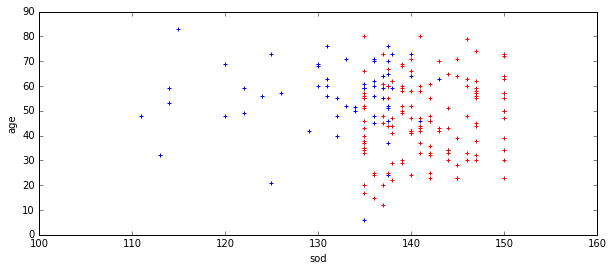

In [11]:
from sklearn import svm


kcd = reduced[reduced['target'] == 0]
nokcd = reduced[reduced['target'] == 1]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(nokcd[feat1],nokcd[feat2] , marker='+')
ax.scatter(kcd[feat1],kcd[feat2] , c= 'red', marker='+')
## plt.scatter(malign[:,0],malign[:,1], c= 'green', marker='o')
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)



# xfit = np.linspace(x_min, x_max)
#for m, b in [(1, 12.6), (1.2, 12.6), (1.8, 11.6)]:
#    plt.plot(xfit, m * xfit + b, '-k')
    
    
plt.show()

El clasificador SV permite configurar el tipos de kernel a usar. Dependiendo del mismo obtenemos fronteras de decisión distintos. Vamos a comparar un kernel lineal y uno poly

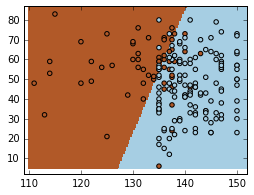

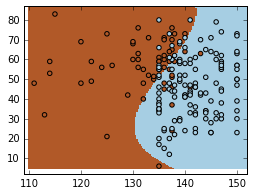

CPU times: user 18.5 s, sys: 12 ms, total: 18.5 s
Wall time: 18.5 s


In [12]:
# figure number

kernels =['linear','poly']
penalty = 0.005
clfs = {} 
def draw_kernels ():
    fignum = 1
    for kernel in kernels:
      
        clf = svm.SVC(kernel=kernel, C=penalty)
        clf.fit(X, Y)
        clfs[kernel]=clf
        


        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(X[[0]], X[[1]], c=Y, zorder=10, cmap=plt.cm.Paired)

        plt.axis('tight')


        XX, YY = np.mgrid[x_min-1:x_max*1.1:200j, 
                          y_min-1:y_max*1.1:200j]
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)


        fignum = fignum + 1

    plt.show()

    
%time draw_kernels()

### El nª de aciertos es similar en ambos casos

In [13]:
prediction_linear = clfs['linear'].predict (X)

print ('accuracy: %f' % (sum( prediction_linear == Y)/len(Y) *100))

accuracy: 84.699454


In [14]:
prediction_poly = clfs['poly'].predict (X)

print ('accuracy: %f' % (sum( prediction_poly == Y)/len(Y) *100))

accuracy: 84.153005


### Matriz de errores

Accuracy 0.846995
[[119   7]
 [ 21  36]]


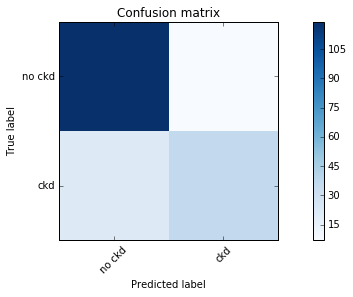

In [15]:
import plots
cm_linear = plots.plot_confusion_matrix (Y,prediction_linear,['no ckd', 'ckd'] )

Accuracy 0.841530
[[111  15]
 [ 14  43]]


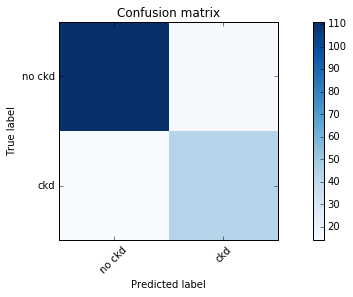

In [16]:
cm_poly = plots.plot_confusion_matrix (Y,prediction_poly,['no ckd', 'ckd'] )

## Metricas: Precision & Recall

precision
 * 1 => no hay falsos positivos => si predice positivo, es que es positivo,

	
\begin{equation*}
\mbox{precision}=\frac{true\ positive}{true\ positive + false\ positive}
\end{equation*}


recall
  *  1 => no hay falsos negativos => si el valor real es posivio, predecimos positivo
   

\begin{equation*}
\mbox{recall (exhaustividad)}=\frac{true\ positive}{true\ positive + false\ negative}
\end{equation*}


F-score: valor único ponderado de la precisión y la exhaustividad

\begin{equation*}
F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}
\end{equation*}


\begin{equation*}
F_1 = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}
\end{equation*}


In [17]:

def show_metrics (cm):
    print(cm)
    [[tn,fp],[fn,tp]]= cm
    acc = (tn+tp ) / len(Y)
    precision = (tp / (tp+fp))
    recall = (tp / (tp+fn))
    f1 = 2 * (precision * recall) / (precision + recall)
    print ('accuracy=%0.3f precision=%0.3f recall=%0.3f f1= %0.3f ' % (acc, precision, recall, f1))

Para el clasificador SVC(kernel='lineal')

In [18]:
show_metrics(cm_linear)

[[119   7]
 [ 21  36]]
accuracy=0.847 precision=0.837 recall=0.632 f1= 0.720 


In [19]:
show_metrics(cm_poly)

[[111  15]
 [ 14  43]]
accuracy=0.842 precision=0.741 recall=0.754 f1= 0.748 
